In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from os import walk
from tqdm import tqdm

In [ ]:
data_paths = ['class001', 'class002', 'class003', 'class004', 'class005', 'class006', 'class007', 'class008']
for data_path in data_paths:
    for root, _, files in walk(data_path):
            for file in tqdm(files[:2000]):
                !python hopenet.py --input {os.path.join(root, file)}

### Read csv file with hopenet outputs

In [2]:
df = pd.read_csv("affectnet_train.csv", names=["class", "image", "pitch", "yaw", "roll"], index_col=None)

In [3]:
df.head()

,class,image,pitch,yaw,roll
0,1,image0012261.jpg,-0.214550,0.152226,0.103692
1,1,image0003195.jpg,0.207676,-0.255355,0.036119
2,1,image0010070.jpg,-0.204092,0.133176,-0.009492
3,1,image0017195.jpg,0.009019,0.060406,-0.076559
4,1,image0014177.jpg,-0.001475,0.212992,0.076477


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770 entries, 0 to 30769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   30770 non-null  int64  
 1   image   30770 non-null  object 
 2   pitch   30770 non-null  float64
 3   yaw     30770 non-null  float64
 4   roll    30770 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.2+ MB


## Data preprocessing (no need actually, done that at the annotation faze)

### Step 1. Clean up the data

In [5]:
df.columns

Index(['class', 'image', 'pitch', 'yaw', 'roll'], dtype='object')

In [6]:
df.head()

,class,image,pitch,yaw,roll
0,1,image0012261.jpg,-0.214550,0.152226,0.103692
1,1,image0003195.jpg,0.207676,-0.255355,0.036119
2,1,image0010070.jpg,-0.204092,0.133176,-0.009492
3,1,image0017195.jpg,0.009019,0.060406,-0.076559
4,1,image0014177.jpg,-0.001475,0.212992,0.076477


## Try to classify the data (?)

In [7]:
from sklearn.cluster import KMeans

In [8]:
data = pd.DataFrame(df.iloc[:, -3:])
data.head()

,pitch,yaw,roll
0,-0.214550,0.152226,0.103692
1,0.207676,-0.255355,0.036119
2,-0.204092,0.133176,-0.009492
3,0.009019,0.060406,-0.076559
4,-0.001475,0.212992,0.076477


In [9]:
k = 4
kmeans = KMeans(n_clusters = k)

In [10]:
kmeans.fit(data)

/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [11]:
kmeans.labels_

array([1, 0, 2, ..., 0, 3, 2], dtype=int32)

In [12]:
data['cluster_label'] = kmeans.labels_

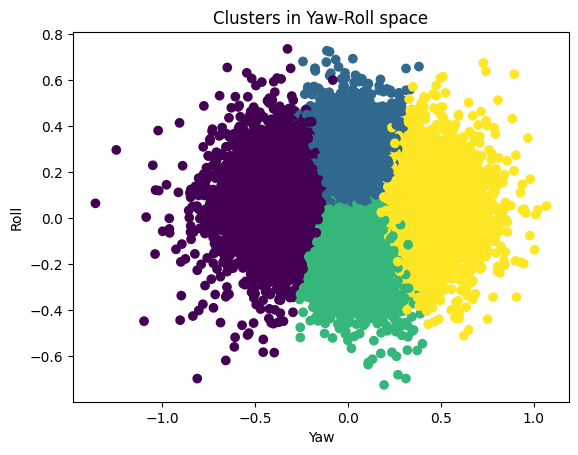

In [13]:
plt.scatter(data['yaw'], data['roll'], c=data['cluster_label'], cmap='viridis')
plt.xlabel('Yaw')
plt.ylabel('Roll')
plt.title('Clusters in Yaw-Roll space')
plt.show()

In [14]:
combined_features = data[['pitch', 'yaw', 'roll']].values

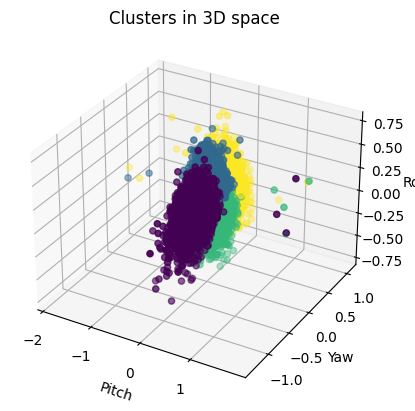

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign cluster labels to each data point
data['direction'] = kmeans.labels_


# Visualize the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['pitch'], data['yaw'], data['roll'], c=data['cluster_label'], cmap='viridis')

ax.set_xlabel('Pitch')
ax.set_ylabel('Yaw')
ax.set_zlabel('Roll')

plt.title('Clusters in 3D space')
plt.show()

In [16]:
data

,pitch,yaw,roll,cluster_label,direction
0,-0.214550,0.152226,0.103692,1,1
1,0.207676,-0.255355,0.036119,0,0
2,-0.204092,0.133176,-0.009492,2,2
3,0.009019,0.060406,-0.076559,2,2
4,-0.001475,0.212992,0.076477,3,3
...,...,...,...,...,...
30765,-0.312755,0.567634,0.265463,3,3
30766,0.293812,-0.195074,0.420204,0,0
30767,0.060171,-0.529791,0.202883,0,0
30768,-0.076886,0.370835,0.175279,3,3


In [17]:
df['direction'] = kmeans.labels_
df.head()

,class,image,pitch,yaw,roll,direction
0,1,image0012261.jpg,-0.214550,0.152226,0.103692,1
1,1,image0003195.jpg,0.207676,-0.255355,0.036119,0
2,1,image0010070.jpg,-0.204092,0.133176,-0.009492,2
3,1,image0017195.jpg,0.009019,0.060406,-0.076559,2
4,1,image0014177.jpg,-0.001475,0.212992,0.076477,3


In [18]:
direction_counts = df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,720
1,1,1,1189
2,1,2,1260
3,1,3,728
4,2,0,694
5,2,1,1672
6,2,2,801
7,2,3,767
8,3,0,767
9,3,1,1086


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


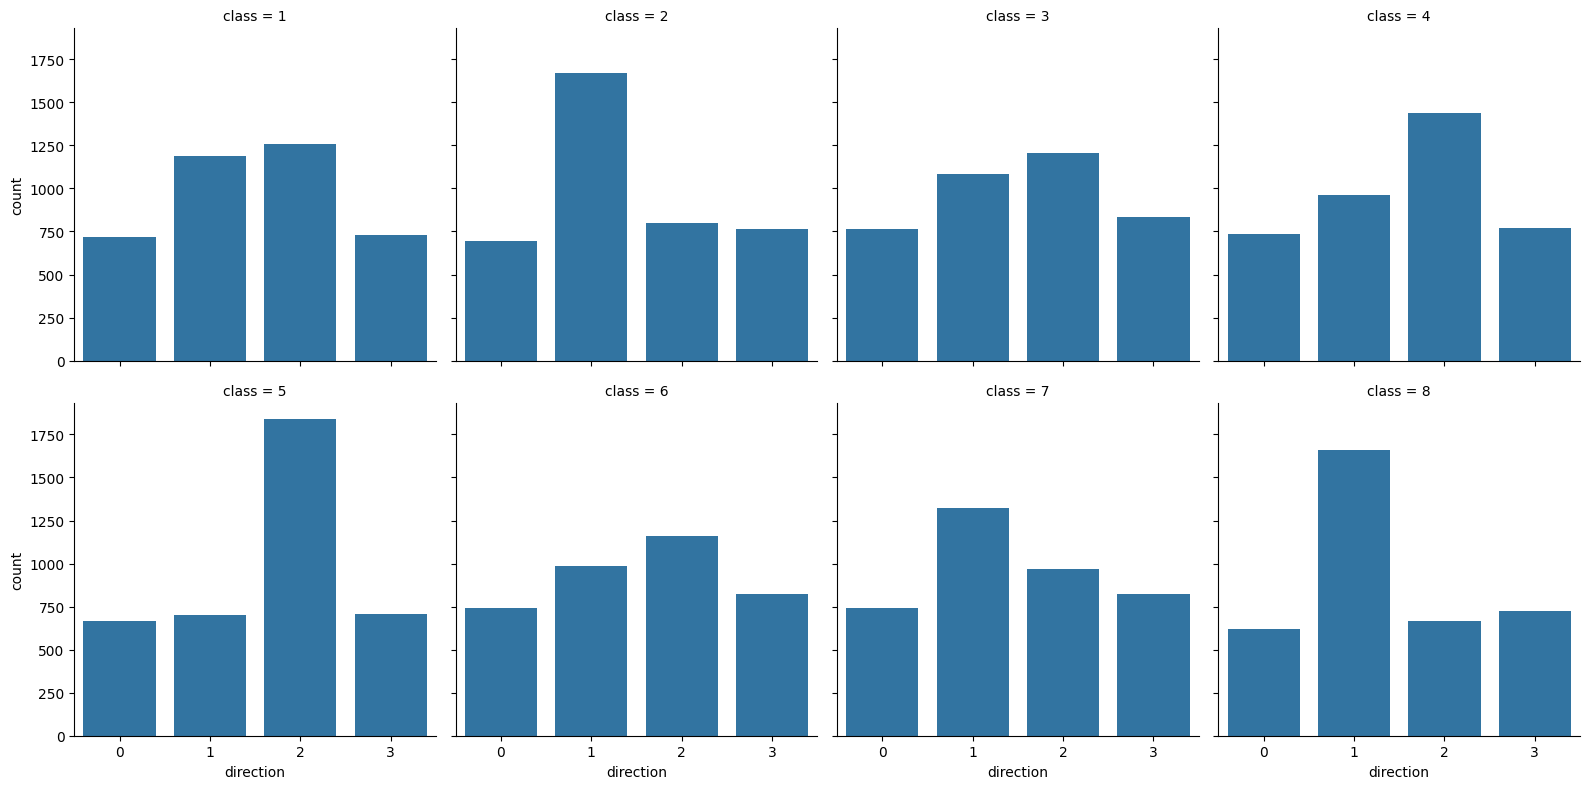

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

In [117]:
print(df.iloc[0]['class'])

1


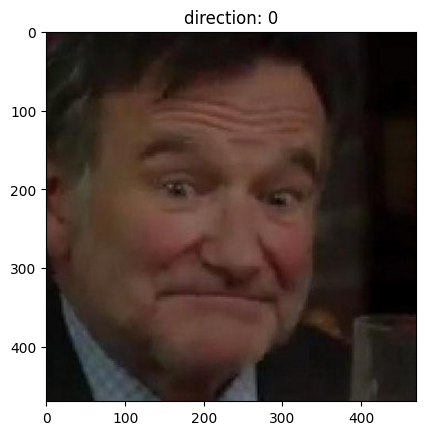

In [20]:
import matplotlib.image as mpimg
n = 15000
path = f"data/affectnet/train/class00{df.iloc[n]['class']}/{df.iloc[n]['image']}"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.title(f"direction: {df.iloc[n]['direction']}")
plt.show()

## PyTorch Loader for the dataset

In [127]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image

class AffectNetDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label